## Data Online Retails
Link: https://archive.ics.uci.edu/dataset/502/online+retail+ii

## Basic Pandas

- ข้อมูลที่โหลดเข้ามาจะเป็น Series = ข้อมูลต่อ ๆ กัน, DataFrame = ข้อมูลตาราง
- สามารถรันคำสั่งที่ต้องการกับ DataFrame ได้เลย ซึ่ง Pandas เตรียมคำสั่งที่ใช้งานง่ายมาแล้ว เช่น .head(), .info()

In [3]:
# Download Pandas version 1.5.3
# !pip install pandas==1.5.3
import pandas as pd

In [4]:
## Basic Pandas - Series
python_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
series_from_dict = pd.Series(python_dict)
series_from_dict.head()

,0
a,1
b,2
c,3
d,4


In [5]:
## Basic Pandas - DataFrame

# Data in lists
data_list = [['Alex', 10], ['Bob', 12], ['Clarke', 13]]

# Create DataFrame with columns
df_from_list = pd.DataFrame(data_list, columns=['Name', 'Age'])

print(df_from_list)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


# EP 2 Workshop - Gift Shop Data Prep
Trending Gifts เป็นร้านขายของขวัญ และของตกแต่ง ตั้งอยู่ใจกลาง กทม. เด็ก ๆ ชอบมาเดินชอปปิ้ง


## การอ่านไฟล์ข้อมูลเข้าสู่ Pandas

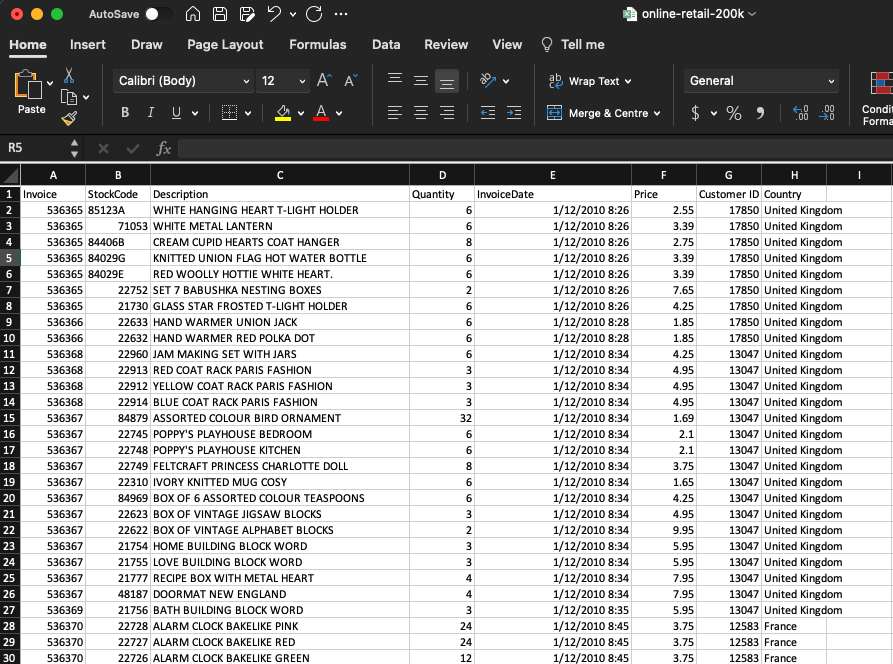

จะเห็นว่า Data นี้แบ่งออกเป็น 8 คอลัมน์
- Invoice: เลขใบแจ้งหนี้
- StockCode: รหัสสินค้า
- Description: ชื่อสินค้า
- Quantity: ปริมาณสินค้า
- InvoiceDate: วัน เวลาที่ออกใบแจ้งหนี้ (วันที่ซื้อ)
- Price: ราคาสินค้า
- Customer ID: รหัสลูกค้า สำหรับลูกค้าแต่ละคน
- Country: ประเทศที่ขายได้

In [11]:
!pip install openpyxl

In [22]:
data = pd.read_excel("online_retail_II.xlsx", engine="openpyxl", sheet_name= 0)

In [25]:
data = pd.read_excel("online_retail_II.xlsx", engine="openpyxl", sheet_name= 1)

## การทำ Data Profiling (ตรวจเช็คข้อมูลเบื้องต้น)

ทำการตรวจสอบข้อมูล และคุณภาพข้อมูลขั้นพื้นฐาน เช่น
- ข้อมูลมีกี่แถว, กี่คอลัมน์
- ข้อมูลหน้าตาเป็นอย่างไร
- แต่ละคอลัมน์เป็นอย่างไร เห็นอะไรผิดปกติบ้าง

In [26]:
data.shape
#row, column

(541910, 8)

In [27]:
data['Invoice'].head()
#example data 10th

,Invoice
0,536365
1,536365
2,536365
3,536365
4,536365


In [ ]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
201628,554310,22424,ENAMEL BREAD BIN CREAM,1,23/5/2011 15:25,24.96,NaN,United Kingdom
201629,554310,22426,ENAMEL WASH BOWL CREAM,1,23/5/2011 15:25,7.46,NaN,United Kingdom
201630,554310,22428,ENAMEL FIRE BUCKET CREAM,1,23/5/2011 15:25,14.13,NaN,United Kingdom
201631,554310,22456,NATURAL SLATE CHALKBOARD LARGE,1,23/5/2011 15:25,9.96,NaN,United Kingdom
201632,554310,22460,EMBOSSED GLASS TEALIGHT HOLDER,1,23/5/2011 15:25,2.46,NaN,United Kingdom


In [28]:
# random
data.sample()
# data.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
498633,578531,85136C,RED SHARK HELICOPTER,1,2011-11-24 14:40:00,7.95,17364.0,United Kingdom


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [30]:
#data.describe()
data.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,541910.0,541910,540456,541910.000000,541910,541910.000000,406830.000000,541910
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


## การแก้ปัญหาในข้อมูลแบบต่าง ๆ

### ปัญหา Data Type Check (ความถูกต้องของประเภทข้อมูล)
ตรวจเช็คและแก้ไขปัญหาความถูกต้องของประเภทข้อมูล เพราะถ้าข้อมูลอ่านผิดประเภท สามารถทำให้การวิเคราะห์ผิดพลาดได้

พบได้บ่อยเวลาเปิดไฟล์ข้อมูลที่รูปแบบคล้ายกับข้อมูลอื่น เช่น
- Customer ID หน้าตาเหมือนตัวเลข ทำให้ Pandas คิดว่าเป็นข้อมูลตัวเลข
  - ความจริงแล้วต้องเป็นข้อมูลตัวหนังสือ เพราะ Customer ID ไม่ได้มีความหมายว่า Customer ID = 100 มีค่ามากกว่า Customer ID = 1
- Invoice Date หน้าตาเหมือนตัวหนังสือ
  - ความจริงแล้วต้องเป็นข้อมูล วัน-เวลา

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


##### ตัวอย่าง Data Type Check - Customer ID

In [32]:
# Customer ID shouldn't be float
data['Customer ID'] = data['Customer ID'].astype(str)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  541910 non-null  object        
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


##### ตัวอย่าง Data Type Check - Invoice Date

In [34]:
# Invoice Date should be date time data type
data['InvoiceDate'].head()

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00


In [35]:
# Convert 'invoiceDate' column to date time
#data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  541910 non-null  object        
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [37]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### ปัญหา Data Consistency (ความสม่ำเสมอของข้อมูล)
ตรวจเช็คและแก้ไขปัญหาด้านความสม่ำเสมอของข้อมูล เช่น เช็คค่าสูงสุด - ต่ำสุด, เช็คการกระจายตัวของข้อมูล เพื่อดูว่ามีสิ่งผิดปกติในข้อมูลหรือไม่

ตัวอย่างเช่น อาจพบว่ามีข้อมูลไปกระจุกตัวกันในช่วงต้นปี เราก็ต้องสอบถามไปยังทีม Data Engineer ว่าทำไมข้อมูลเป็นแบบนี้ (อาจจะเป็นปกติ เช่น ธุรกิจอาจจะเปิดตัวสินค้าใหม่ช่วงนั้นพอดี หรืออาจจะไม่ปกติ เช่น อาจจะมีการดึงข้อมูลมาไม่สมบูรณ์)

คอลัมน์ตัวเลข (Number) กับตัวหนังสือ (String) มีวิธีตรวจเช็ค Data Consistency ไม่เหมือนกัน ดังนี้

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201633 entries, 0 to 201632
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      201633 non-null  object        
 1   StockCode    201633 non-null  object        
 2   Description  200836 non-null  object        
 3   Quantity     201633 non-null  int64         
 4   InvoiceDate  201633 non-null  datetime64[ns]
 5   Price        201633 non-null  float64       
 6   Customer ID  201633 non-null  object        
 7   Country      201633 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 12.3+ MB


#### Number (คอลัมน์ประเภท int, float) - Price column

In [38]:
# Check data consistency of Price column

# - Check min-max
price_min = data['Price'].min()
price_max = data['Price'].max()

(price_min, price_max)

(-11062.06, 38970.0)

In [39]:
# - Check distribution [1 of many methods e.g. plot graph]
data['Price'].value_counts()

,count
Price,
1.25,50496
1.65,38181
0.85,28497
2.95,27768
0.42,24533
...,...
185.28,1
187.21,1
252.57,1


In [40]:
# Sorting
data['Price'].value_counts().sort_index()

,count
Price,
-11062.060,2
0.000,2515
0.001,4
0.010,1
0.030,3
...,...
13541.330,3
16453.710,1
16888.020,1


<Axes: >

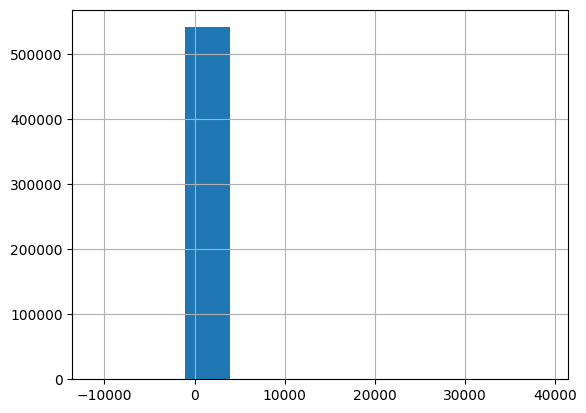

In [41]:
# Use data visualization [Histogram] to help with data checking (more in EP 3)
data['Price'].hist()

ตอนนี้เห็นภาพของข้อมูล Price คร่าว ๆ แล้ว เราจะมาวิเคราะห์คอลัมน์ Price กันต่อในส่วนปัญหา Outliers

#### String - Country column

In [42]:
# Check for unique value in country column
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [43]:
# Show sorted by A-Z result, and one data per line
sorted_countries = sorted(data['Country'].unique())
for country in sorted_countries:
  print(country)

Australia
Austria
Bahrain
Belgium
Brazil
Canada
Channel Islands
Cyprus
Czech Republic
Denmark
EIRE
European Community
Finland
France
Germany
Greece
Hong Kong
Iceland
Israel
Italy
Japan
Lebanon
Lithuania
Malta
Netherlands
Norway
Poland
Portugal
RSA
Saudi Arabia
Singapore
Spain
Sweden
Switzerland
USA
United Arab Emirates
United Kingdom
Unspecified


In [44]:
# Check `unspecified` country
data[ data['Country'] == 'Unspecified' ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
498778,578539,22560,TRADITIONAL MODELLING CLAY,24,2011-11-24 14:55:00,1.25,nan,Unspecified
498779,578539,23570,TRADITIONAL PICK UP STICKS GAME,12,2011-11-24 14:55:00,1.25,nan,Unspecified
498780,578539,23571,TRADITIONAL NAUGHTS & CROSSES,12,2011-11-24 14:55:00,1.65,nan,Unspecified
498781,578539,84992,72 SWEETHEART FAIRY CAKE CASES,24,2011-11-24 14:55:00,0.55,nan,Unspecified


In [45]:
# Check 'Unspecified' country & 'nan' customer ID
data[ (data['Country'] == 'Unspecified') & (data['Customer ID'] == 'nan') ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
196612,553857,23090,VINTAGE GLASS T-LIGHT HOLDER,12,2011-05-19 13:30:00,0.83,nan,Unspecified
196613,553857,47021G,SET/6 BEAD COASTERS GAUZE BAG GOLD,48,2011-05-19 13:30:00,0.39,nan,Unspecified
196614,553857,79030D,TUMBLER BAROQUE,24,2011-05-19 13:30:00,0.39,nan,Unspecified
196615,553857,84877A,PINK ROUND COMPACT MIRROR,24,2011-05-19 13:30:00,1.25,nan,Unspecified
196616,553857,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2011-05-19 13:30:00,1.25,nan,Unspecified
...,...,...,...,...,...,...,...,...
498778,578539,22560,TRADITIONAL MODELLING CLAY,24,2011-11-24 14:55:00,1.25,nan,Unspecified
498779,578539,23570,TRADITIONAL PICK UP STICKS GAME,12,2011-11-24 14:55:00,1.25,nan,Unspecified
498780,578539,23571,TRADITIONAL NAUGHTS & CROSSES,12,2011-11-24 14:55:00,1.65,nan,Unspecified
498781,578539,84992,72 SWEETHEART FAIRY CAKE CASES,24,2011-11-24 14:55:00,0.55,nan,Unspecified


เราจะเห็นได้ว่า InvoiceID หลายตัวมีบางอย่างเกิดขึ้น ('nan' Customer ID & 'Unspecified' country)

เป็นหน้าที่ของ data engineer ในการตรวจสอบว่าเกิดอะไรขึ้น

หน้าที่ของเรา (data analysts) คือการค้นหาปัญหา ยิ่งถ้าเจอ Pattern ยิ่งช่วยให้ data engineer เช็คต่อได้ง่าย

### ปัญหา missing value (ข้อมูลหาย)

ตรวจเช็คและแก้ไขปัญหาข้อมูลหาย ซึ่งการที่ข้อมูลบางส่วนหายไปสามารถเกิดได้จากทั้ง
- ระบบใส่ข้อมูลมีปัญหา สามารถเป็น Human Error (เกิดจากมนุษย์) หรือ Machine Error (เกิดจากเครื่องจักร)
- ระบบเก็บข้อมูลมีปัญหา เช่น ฐานข้อมูลล่มช่วงเช้าวันเสาร์ ทำให้เก็บข้อมูลช่วงนั้นไม่ได้

เรามาเริ่มจากการเช็คว่ามีข้อมูลอะไรหายบ้าง

(Null = ค่าว่างเปล่า, คล้ายกับ NaN = Not a Number = ค่าที่ไม่ใช่ตัวเลข ซึ่งบางระบบ เช่น Pandas ก็จะมีการใช้ NaN แทน ค่าว่างเปล่า)


In [46]:
# Check for missing value in one column
data[ data['Price'].isnull() ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [47]:
# Check for missing values in all columns
data.isnull().sum()

,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


เจาะลึกเข้าไปในคอลัมน์ Description

In [48]:
# Check for null value in description
data[ data['Description'].isnull() ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,nan,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,nan,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,nan,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,nan,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,nan,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,nan,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,nan,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,nan,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,nan,United Kingdom


In [58]:
# Check for the first one
data[ data['StockCode'].astype(str).str.strip() == '22139' ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,nan,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,nan,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,nan,United Kingdom
7202,537011,22139,NaN,-5,2010-12-03 15:38:00,0.00,nan,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,nan,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,nan,United Kingdom


In [56]:
# Check for unique value
data[ data['StockCode'].astype(str).str.strip() == '22139' ]['Description'].value_counts(dropna=False)

,count
Description,
RETROSPOT TEA SET CERAMIC 11 PC,988
NaN,4
amazon,1


In [60]:
# Check for second one
data[ data['StockCode'].astype(str).str.strip() == '21134' ]['Description'].value_counts(dropna=False)

,count
Description,
NaN,1


In [61]:
# Check for third one
data[ data['StockCode'].astype(str).str.strip() == '37509' ]['Description'].value_counts(dropna=False)

,count
Description,
NaN,2
NEW ENGLAND MUG W GIFT BOX,2


ปัญหา Description หายอาจจะเป็น Machine Error เพราะสินค้าที่ Stock Code เดียวกัน ก็ Description หายได้

เราจะมาลองเขียนโค้ดในการแทนที่ค่าที่หายไป โดยอิงจาก Stock Code เดียวกัน

#### แทนที่ค่าที่หายไป โดยอิงจาก Stock Code เดียวกัน

In [64]:
data.loc[62, 'Description']

'RED WOOLLY HOTTIE WHITE HEART.'

In [65]:
data.loc[62, 'StockCode']

'84029E'

In [ ]:
data[ (data['StockCode'] == data.loc[622, 'StockCode']) & (data['Description'].notna()) ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,nan,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,nan,United Kingdom
14908,537624,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2010-12-07 14:41:00,4.95,12748.0,United Kingdom
15018,537633,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2010-12-07 15:14:00,4.95,nan,United Kingdom
...,...,...,...,...,...,...,...,...
199520,554098,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-05-22 13:01:00,4.95,14769.0,United Kingdom
200022,554111,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-05-22 14:40:00,4.95,15724.0,United Kingdom
200136,554114,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-05-22 15:00:00,4.95,15292.0,United Kingdom
200713,554151,22139,RETROSPOT TEA SET CERAMIC 11 PC,24,2011-05-23 11:07:00,4.25,14049.0,United Kingdom


In [66]:
data[ (data['StockCode'] == data.loc[62, 'StockCode']) & (data['Description'].notna()) ]['Description'].iloc[0]

'RED WOOLLY HOTTIE WHITE HEART.'

In [67]:
data.loc[62, 'Description'] = data[ (data['StockCode'] == data.loc[62, 'StockCode']) & (data['Description'].notna()) ]['Description'].iloc[0]

In [68]:
# Verify change
data.loc[62]

,62
Invoice,536373
StockCode,84029E
Description,RED WOOLLY HOTTIE WHITE HEART.
Quantity,6
InvoiceDate,2010-12-01 09:02:00
Price,3.39
Customer ID,17850.0
Country,United Kingdom


In [69]:
def replace_description(df):
  # Loop through each row
  for i in range(len(df)):
    if pd.isnull(df.loc[i, 'Description']):
      # Get stock code
      stock_code = df.loc[i, 'StockCode']
      # Look for description
      temp_df = df[(df['StockCode'] == stock_code) & (data['Description'].notna())]
      if len(temp_df) > 0:
        first_row_temp_df_desc = temp_df['Description'].iloc[0]
        df.loc[i, 'Description'] = first_row_temp_df_desc
  return df

data_updated = replace_description(data)

In [70]:
# Verify change
data_updated.isnull().sum()

,0
Invoice,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


เหลือสินค้าอีก 106 ชิ้นที่ Description ยังว่างเปล่า

In [71]:
data_updated[ data_updated['Description'].isnull() ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,nan,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,nan,United Kingdom
2023,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,nan,United Kingdom
2024,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,nan,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,nan,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,nan,United Kingdom
281615,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,nan,United Kingdom
281616,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,nan,United Kingdom
346849,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,nan,United Kingdom


#### ทำไมยังมีสินค้า Description = ว่างเปล่า?

อาจเกิดขึ้นได้จาก
- สินค้าอาจจะถูกลบไปจากระบบแล้ว
- เทสระบบ
- กรอกข้อมูลผิด

เนื่องจากข้อมูลนี้ผิดปกติ แนะนำให้สอบถาม Data Engineer เพื่อตรวจเช็คเพิ่มเติม แต่ละบริษัทไม่เหมือนกัน

### ปัญหา Outliers (ข้อมูลสูงหรือต่ำผิดปกติ)
ตรวจเช็คและแก้ไขปัญหาค่าที่สูงหรือต่ำผิดปกติ เพราะอาจจะเป็นค่าที่กรอกข้อมูลเข้ามาผิด

หากมี Outliers ที่เกิดจากความผิดพลาดในการใส่ข้อมูล ทำให้ผลวิเคราะห์ผิดเพี้ยนได้เยอะ เราต้องทำการสอบถาม Data Engineer ว่าข้อมูลผิดหรือไม่

บาง Outliers เกิดจากข้อมูลจริงที่ค่าสูงหรือต่ำจากปกติ (เช่น ข้อมูลบ้านทั่วไทย มีห้องนอนเฉลี่ย 3 ห้องนอน แต่อาจจะมีคฤหาสน์ที่มี 10 ห้องนอนโผล่ขึ้นมา) ถ้าเป็นกรณีนี้เราไม่ต้องทำอะไร

In [ ]:
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201633 entries, 0 to 201632
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      201633 non-null  object        
 1   StockCode    201633 non-null  object        
 2   Description  201527 non-null  object        
 3   Quantity     201633 non-null  int64         
 4   InvoiceDate  201633 non-null  datetime64[ns]
 5   Price        201633 non-null  float64       
 6   Customer ID  201633 non-null  object        
 7   Country      201633 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 12.3+ MB


In [72]:
# Choose Price column to check for outlier
# - Check min-max
price_min = data_updated['Price'].min()
price_max = data_updated['Price'].max()

(price_min, price_max)

(-11062.06, 38970.0)

In [73]:
data_updated['Price'].value_counts()

,count
Price,
1.25,50496
1.65,38181
0.85,28497
2.95,27768
0.42,24533
...,...
185.28,1
187.21,1
252.57,1


In [74]:
data_updated['Price'].value_counts().sort_index()

,count
Price,
-11062.060,2
0.000,2515
0.001,4
0.010,1
0.030,3
...,...
13541.330,3
16453.710,1
16888.020,1


In [75]:
data_updated[ data_updated['Price'] == 0 ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.0,nan,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,nan,United Kingdom
1985,536547,37509,NEW ENGLAND MUG W GIFT BOX,1,2010-12-01 14:33:00,0.0,nan,United Kingdom
1986,536546,22145,CHRISTMAS CRAFT HEART STOCKING,1,2010-12-01 14:33:00,0.0,nan,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,nan,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2011-12-08 10:33:00,0.0,nan,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,nan,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,nan,United Kingdom
538554,581408,85175,CACTI T-LIGHT CANDLES,20,2011-12-08 14:06:00,0.0,nan,United Kingdom


In [76]:
data_updated[ (data_updated['Price'] == 0) & (data_updated['Quantity'] > 0) ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.0,nan,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,nan,United Kingdom
1985,536547,37509,NEW ENGLAND MUG W GIFT BOX,1,2010-12-01 14:33:00,0.0,nan,United Kingdom
1986,536546,22145,CHRISTMAS CRAFT HEART STOCKING,1,2010-12-01 14:33:00,0.0,nan,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,nan,United Kingdom
...,...,...,...,...,...,...,...,...
535334,581211,22142,check,14,2011-12-07 18:36:00,0.0,nan,United Kingdom
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2011-12-08 10:33:00,0.0,nan,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,nan,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,nan,United Kingdom


#### ทำไมของราคา = 0?

อาจเกิดขึ้นได้จาก
- ของแจก Promotion ลดแลกแจกแถม
- ของให้ลองใช้ Sample
- มีความหมายอื่น ๆ เช่น 0 อาจจะหมายถึงการคืนของ?
- Test ระบบ?
- กรอกข้อมูลผิด?

เนื่องจากข้อมูลนี้ก้ำกึ่งว่าข้อมูลผิดพลาดมั้ย แนะนำให้สอบถาม Data Engineer เพื่อตรวจเช็คเพิ่มเติม แต่ละบริษัทไม่เหมือนกัน

## เทคนิคเตรียมข้อมูลอื่น ๆ

### การสร้างคอลัมน์ใหม่ โดยอิงจากค่าเดิม หรือรวมค่าในคอลัมน์ที่มีอยู่แล้ว

การสร้างคอลัมน์ใหม่สามารถทำให้วิเคราะห์ต่อได้ง่ายขึ้น (EP 3)

เช่น คำนวณมูลค่าของแต่แถวข้อมูล = จำนวนสินค้า x ราคาต่อชิ้น

In [77]:
data_updated['Total'] = data_updated['Quantity'] * data_updated['Price']
data_updated.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### การลบคอลัมน์ที่ไม่ใช้
การลบคอลัมน์ช่วยลดข้อมูลซ้ำซ้อนได้ และอาจช่วยให้ไฟล์ข้อมูลเบาลง

เช่น การแบ่งคอลัมน์ InvoiceDate (วัน+เวลา) เป็น คอลัมน์วัน กับ คอลัมน์เวลา เพื่อให้ทำการวิเคราะห์ง่ายขึ้น แล้วลบคอลัมน์ InvoiceDate ออก

In [78]:
# Split 'InvoiceDate' column into 'InvoiceDate' and 'InvoiceTime' columns
data_updated['InvoiceDay'] = data_updated['InvoiceDate'].dt.date
data_updated['InvoiceTime'] = data_updated['InvoiceDate'].dt.time
data_updated.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceDay,InvoiceTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00


In [79]:
# Re-verify
data_updated.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceDay,InvoiceTime
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12:50:00
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-09,12:50:00
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,18.00,2011-12-09,12:50:00


In [80]:
# Remove 'InvoiceDate' column
data_updated = data_updated.drop('InvoiceDate', axis=1)

In [81]:
# Verify
data_updated.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Total,InvoiceDay,InvoiceTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00


### วิธี Export ข้อมูล
นำข้อมูลออกจากระบบ เพื่อส่งต่อ หรือนำไปวิเคราะห์ต่อไป

In [82]:
# The new data should have extra columns (Total, InvoiceDay, InvoiceTime)
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  541798 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   Price        541910 non-null  float64
 5   Customer ID  541910 non-null  object 
 6   Country      541910 non-null  object 
 7   Total        541910 non-null  float64
 8   InvoiceDay   541910 non-null  object 
 9   InvoiceTime  541910 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 41.3+ MB


In [83]:
# Export data_updated as CSV
data_updated.to_csv('retail-200k-for-ep3-ep4.csv', index=False)

# Class Project

เขียนโค้ดเพื่อตอบคำถามต่อไปนี้

## คำถาม 1) คอลัมน์ Quantity มี Outlier มั้ย

In [84]:
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# สร้างเงื่อนไขหา outlier
outlier_condition = (data['Quantity'] < (Q1 - 1.5 * IQR)) | (data['Quantity'] > (Q3 + 1.5 * IQR))
outliers = data[outlier_condition]

print(outliers.shape)
outliers.head()


(58619, 11)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceDay,InvoiceTime
13,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01,08:34:00
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00,2010-12-01,08:45:00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00,2010-12-01,08:45:00
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.60,2010-12-01,08:45:00
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,40.80,2010-12-01,08:45:00


## คำถาม 2) มีการขายในประเทศเยอรมนีทั้งหมดกี่ครั้ง

In [86]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [90]:
Germany = (data['Country'] == 'Germany')
data[Germany].shape[0]

9495

## คำถาม 3) มี Invoice ทั้งหมดกี่ใบ

In [91]:
data['Invoice'].shape[0]

541910